참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import sympy.plotting as splot
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

## 예제 05.004

### 문제에서 주어진 변수

#### 각 구간 길이

In [2]:
L_AB_m, L_BD_m = sy.symbols('L_AB_m, L_BD_m')

L_AD_m = L_AB_m + L_BD_m

s_d = {L_AB_m: 3, 
       L_BD_m: 3}

#### 하중

In [3]:
P_A_N = sy.Symbol('P_A_N')
M_B_Nm = sy.Symbol('M_B_Nm')
s_d[P_A_N] = -5000
s_d[M_B_Nm] = +25000

#### 단면

W 200 $\times$ 100 에 관련된 자료는 p.608 참고<br>For data on W 200 $\times$ 100 section, see Table B-2 (p. 608).

In [4]:
A_m2, I_m4, h_m, S_m3 = sy.symbols('A_m2, I_m4, h_m, S_m3')
A_mm2 = A_m2 * (1e3) ** 2
I_mm4 = I_m4 * (1e3) ** 4
h_mm = h_m * 1e3
S_mm3 = S_m3 * (1e3) ** 3

mm 단위 값은 다음과 같다.<br>Following cell contains values in mm units.

In [5]:
s_d.update({A_mm2: 12700.0,
            I_mm4: 113e6,
            h_mm: 229,
            S_mm3: 990e3})

m 단위 값은 다음과 같다.<br>Following cell contains values in m units.

In [6]:
s_d.update({A_m2: s_d[A_mm2] * (1e-3) ** 2,
            I_m4: s_d[I_mm4] * (1e-3) ** 4,
            h_m: s_d[h_mm] * 1e-3,
            S_m3: s_d[S_mm3] * (1e-3) ** 3})

준비된 변수값 표는 다음과 같다.

In [7]:
s_d

### A, B, C, D 지점의 x 좌표

A 점에서 x=0 으로 한다.

In [8]:
x_A_m = 0
x_B_m = float(x_A_m + L_AB_m.subs(s_d))
x_D_m = float(x_B_m + L_BD_m.subs(s_d))

### 반력

외팔보로 D 점에 수직 방향과 모멘트 반력이 가해짐

#### 수직 반력

In [9]:
R_D_N = sy.Symbol('R_D_N')

In [10]:
vf_eq = sy.Eq(R_D_N + P_A_N, 0)
vf_eq

In [11]:
R_D_N_sol_list = sy.solve(vf_eq, R_D_N)
R_D_N_sol_list

In [12]:
r_D_N = R_D_N_sol_list[0].subs(s_d)
r_D_N

#### 모멘트 반력

In [13]:
RM_D_Nm = sy.Symbol('RM_D_Nm')

In [14]:
moment_eq = sy.Eq(P_A_N * L_AD_m + M_B_Nm + RM_D_Nm, 0)
moment_eq

In [15]:
RM_D_Nm_sol_list = sy.solve(moment_eq, RM_D_Nm)
RM_D_Nm_sol_list

In [16]:
rm_D_Nm = RM_D_Nm_sol_list[0].subs(s_d)
rm_D_Nm

### 전단력선도

In [17]:
V_AD_N = P_A_N

In [18]:
x = sy.Symbol('x')

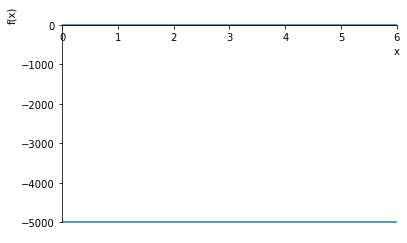

In [19]:
splot.plot((V_AD_N.subs(s_d), (x, 0, L_AD_m.subs(s_d))),
           (0.0, (x, 0, L_AD_m.subs(s_d))))

### 굽힘모멘트선도

In [20]:
M_AB_Nm = V_AD_N * x
M_BD_Nm = V_AD_N * x + M_B_Nm

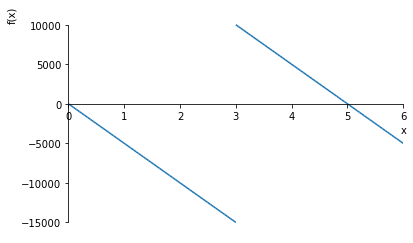

In [21]:
splot.plot(
    (M_AB_Nm.subs(s_d), (x, 0, x_B_m)),
    (M_BD_Nm.subs(s_d), (x, x_B_m, x_D_m)),
)

### 최대 굽힘응력<br>Max bending stress

p. 170 eq. 5.4b

$$\sigma_{max}=\frac{|M|_{max}}{S}$$

W200$\times$100 단면의 경우, p. 608 표 B-2에 따르면 S 값은 $990 \cdot 10^3 mm^3$ 이다.<br>For W200$\times$100 section, according to (p. 608) Table B-2, S is $990 \cdot 10^3 mm^3$.

In [22]:
sigma_AB_Pa = abs(M_AB_Nm) / S_m3
sigma_BD_Pa = abs(M_BD_Nm) / S_m3
sigma_AB_Pa, sigma_BD_Pa

굽힘응력 선도를 표시하면 다음과 같다.<br>The following cell shows the plot of the bending stress.

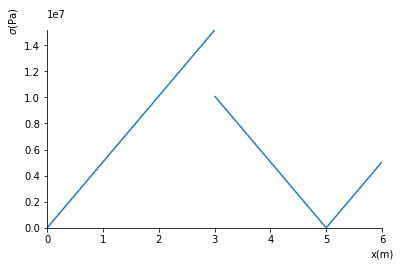

In [23]:
splot.plot(
    (sigma_AB_Pa.subs(s_d), (x, 0, x_B_m)),
    (sigma_BD_Pa.subs(s_d), (x, x_B_m, x_D_m)),
    xlabel='x(m)', ylabel='$\\sigma$(Pa)'
)

최대 응력은 B 점에서 발생할 것으로 예상된다. Pa 단위값은 다음과 같다.<br>Maximum stress is expected at point B. In Pa unit, the value is as follows.

In [24]:
sigma_AB_Pa.subs(s_d).subs(x, x_B_m)

MPa 단위값은 다음과 같다.<br>In MPa unit, the value is as follows.

In [25]:
sigma_AB_Pa.subs(s_d).subs(x, x_B_m) * 1e-6

### 굽힘응력 분포<br>Distribution of bending stress

`x` `y` 격자<br>`x` `y` grids

In [26]:
dx_m = 1e-3
dx_half_m = 0.5 * dx_m

x_m_array = np.arange(0, x_D_m + dx_half_m, dx_m)

h_half_m = s_d[h_m] * 0.5
y_m_array = np.arange(-h_half_m, h_half_m + dx_half_m, dx_m)

y_m_grid, x_m_grid = np.meshgrid(y_m_array, x_m_array)

모멘트 격자<br>Moment grid

In [27]:
M_Nm = sy.Piecewise((M_AB_Nm.subs(s_d), x<=x_B_m),
                    (M_BD_Nm.subs(s_d), x_B_m<x))

In [28]:
f_M_Nm = sy.lambdify(x, M_Nm)

In [29]:
M_Nm_grid = f_M_Nm(x_m_grid)

응력 격자<br>Stress grid

In [30]:
sigma_Pa_grid = M_Nm_grid * y_m_grid / (-s_d[I_m4])

굽힘응력 분포<br>Distribution of bending stress

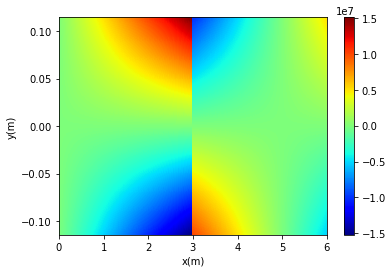

In [31]:
plt.pcolormesh(x_m_grid, y_m_grid, sigma_Pa_grid, cmap='jet', shading='flat')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar()
plt.show()